In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv('/Users/natimarcus/Desktop/GA2/Unit 2/Lesson 5/titanic.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.Age - (df.Age*2)

0     -22.0
1     -38.0
2     -26.0
3     -35.0
4     -35.0
5       NaN
6     -54.0
7      -2.0
8     -27.0
9     -14.0
10     -4.0
11    -58.0
12    -20.0
13    -39.0
14    -14.0
15    -55.0
16     -2.0
17      NaN
18    -31.0
19      NaN
20    -35.0
21    -34.0
22    -15.0
23    -28.0
24     -8.0
25    -38.0
26      NaN
27    -19.0
28      NaN
29      NaN
       ... 
861   -21.0
862   -48.0
863     NaN
864   -24.0
865   -42.0
866   -27.0
867   -31.0
868     NaN
869    -4.0
870   -26.0
871   -47.0
872   -33.0
873   -47.0
874   -28.0
875   -15.0
876   -20.0
877   -19.0
878     NaN
879   -56.0
880   -25.0
881   -33.0
882   -22.0
883   -28.0
884   -25.0
885   -39.0
886   -27.0
887   -19.0
888     NaN
889   -26.0
890   -32.0
Name: Age, Length: 891, dtype: float64

In [16]:
df['family_size'] = (df.SibSp) + (df.Parch)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
df['old_young'] = np.where(df['Age'] > 35, 'Old', 'Young')

In [21]:
df[['old_young', 'Age']].head() # need double brackets for more than one key

,old_young,Age
0,Young,22.0
1,Old,38.0
2,Young,26.0
3,Young,35.0
4,Young,35.0


In [22]:
conditions = [
    (df['Sex'] == 'male') & (df['Age'] >= 35),
    (df['Sex'] == 'male') & (df['Age'] < 35),
    (df['Sex'] == 'female') & (df['Age'] >= 35),
    (df['Sex'] == 'female') & (df['Age'] < 35)
]
results = [
    'M-Old',
    'M-Young',
    'F-Old',
    'F-Young'
]

df['Age_Status'] = np.select(conditions, results, 'Other')

In [23]:
df['Age_Status'].head()

0    M-Young
1      F-Old
2    F-Young
3      F-Old
4      M-Old
Name: Age_Status, dtype: object

In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
new_vals = {
    'S': 1,
    'C': 2,
    'Q': 3
}

df['Embarked'] = df['Embarked'].map(new_vals)

In [27]:
df['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [30]:
df['ticket_type'] = pd.cut(df['Fare'], bins = 3, labels = ['economy', 'business', 'vip']) #creates bins based off histogram

In [31]:
df['ticket_type']

0       economy
1       economy
2       economy
3       economy
4       economy
5       economy
6       economy
7       economy
8       economy
9       economy
10      economy
11      economy
12      economy
13      economy
14      economy
15      economy
16      economy
17      economy
18      economy
19      economy
20      economy
21      economy
22      economy
23      economy
24      economy
25      economy
26      economy
27     business
28      economy
29      economy
         ...   
861     economy
862     economy
863     economy
864     economy
865     economy
866     economy
867     economy
868     economy
869     economy
870     economy
871     economy
872     economy
873     economy
874     economy
875     economy
876     economy
877     economy
878     economy
879     economy
880     economy
881     economy
882     economy
883     economy
884     economy
885     economy
886     economy
887     economy
888     economy
889     economy
890     economy
Name: ticket_type, Lengt

In [32]:
def some_function(age):
    if age % 2 == 0:
        return 'even'
    else:
        return 'odd'
    
df['odds_even_age'] = df['Age'].apply(some_function)

In [33]:
df['odds_even_age'].value_counts()

odd     511
even    380
Name: odds_even_age, dtype: int64

In [36]:
%timeit df['Age_Status'] = np.select(conditions, results, 'Other')

360 µs ± 9.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
def another_function(row):
    if row['Sex'] == 'male' and row['Age'] >= 35:
        return 'M-Old'
    elif row['Sex'] == 'male' and row['Age'] < 35:
        return 'M-Young'
    elif row['Sex'] == 'female' and row['Age'] >= 35:
        return 'F-Old'                       
    elif row['Sex'] == 'female' and row['Age'] < 35:
        return 'F-Young'
    else:
        'Other'

In [42]:
%timeit df['Age-Status'] = df.apply(another_function, axis = 1)

110 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
df['Name'].str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
5                                   [Moran,, Mr., James]
6                           [McCarthy,, Mr., Timothy, J]
7                    [Palsson,, Master., Gosta, Leonard]
8      [Johnson,, Mrs., Oscar, W, (Elisabeth, Vilhelm...
9              [Nasser,, Mrs., Nicholas, (Adele, Achem)]
10                  [Sandstrom,, Miss., Marguerite, Rut]
11                          [Bonnell,, Miss., Elizabeth]
12                   [Saundercock,, Mr., William, Henry]
13                      [Andersson,, Mr., Anders, Johan]
14            [Vestrom,, Miss., Hulda, Amanda, Adolfina]
15                 [Hewlett,, Mrs., (Mary, D, Kingcome)]
16                              [Rice,, Master., Eugene]
17                     [William

In [49]:
users = pd.read_csv('/Users/natimarcus/Desktop/GA2/Unit 2/Lesson 6/user.tbl', sep = '|')

In [50]:
users.tail()

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [51]:
users.index

RangeIndex(start=0, stop=943, step=1)

In [52]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [53]:
users.columns.tolist()

['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [54]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [55]:
users['age'].memory_usage()

7624

In [56]:
users['age'].max()

73

In [57]:
users['gender'].astype('category').memory_usage()

1119

In [58]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [59]:
users.describe(include = ['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [60]:
users.describe(include = 'all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [61]:
users[users.age > 35].mean()

user_id    464.486559
age         46.809140
dtype: float64

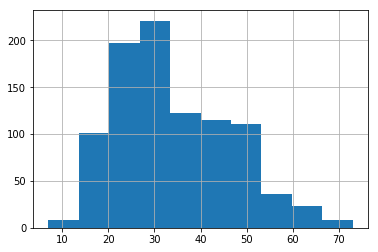

In [62]:
users.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123fbba20>,
      dtype=object)

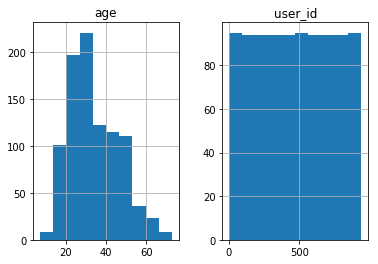

In [63]:
users.hist()

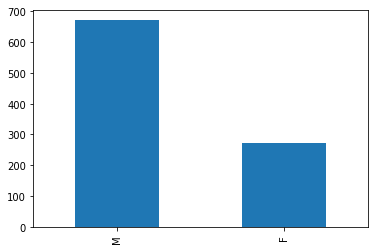

In [64]:
users.gender.value_counts().plot(kind = 'bar')

In [65]:
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

In [66]:
users.age.value_counts().sort_index()

7      1
10     1
11     1
13     5
14     3
15     6
16     5
17    14
18    18
19    23
20    32
21    27
22    37
23    28
24    33
25    38
26    34
27    35
28    36
29    32
30    39
31    25
32    28
33    26
34    17
35    27
36    21
37    19
38    17
39    22
      ..
41    10
42    21
43    13
44    23
45    15
46    12
47    14
48    20
49    19
50    20
51    20
52     6
53    12
54     4
55    11
56     6
57     9
58     3
59     3
60     9
61     3
62     2
63     3
64     2
65     3
66     1
68     2
69     2
70     3
73     1
Name: age, Length: 61, dtype: int64

In [67]:
users.age.value_counts().sort_values()

7      1
11     1
66     1
73     1
10     1
62     2
69     2
68     2
64     2
14     3
65     3
63     3
61     3
59     3
70     3
58     3
54     4
16     5
13     5
15     6
56     6
52     6
60     9
57     9
41    10
55    11
53    12
46    12
43    13
47    14
      ..
45    15
38    17
34    17
18    18
37    19
49    19
48    20
50    20
51    20
42    21
36    21
40    21
39    22
44    23
19    23
31    25
33    26
21    27
35    27
23    28
32    28
20    32
29    32
24    33
26    34
27    35
28    36
22    37
25    38
30    39
Name: age, Length: 61, dtype: int64

In [68]:
users.age.value_counts().sort_values(ascending = False)

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
58     3
70     3
59     3
61     3
63     3
65     3
14     3
64     2
68     2
69     2
62     2
10     1
73     1
66     1
11     1
7      1
Name: age, Length: 61, dtype: int64

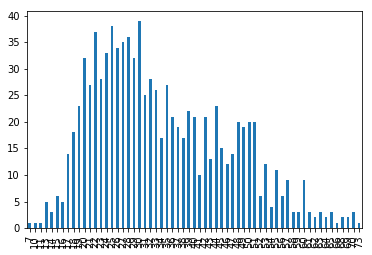

In [69]:
users.age.value_counts().sort_index().plot(kind = 'bar')

In [70]:
users.age.unique()

array([24, 53, 23, 33, 42, 57, 36, 29, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 31, 51, 17,
       48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66, 62,
       11, 65, 68, 63, 64, 10, 73, 58, 69, 70])

In [71]:
users.age.nunique()

61

In [72]:
users.age.nlargest(10)

480    73
766    70
802    70
859    70
558    69
584    69
348    68
572    68
210    66
317    65
Name: age, dtype: int64